In [6]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# the welfare report calculates new consumption per capita as ((ra)/(price index))/(new labor endowment)
# for IA skilled workers in HH1

# the new labor  after the shock is: 0.254310906294
# the price index is: 0.999024
# the ra is 0.865767
print((0.865767/0.999024)/0.254310906294)
## new consumption is 3.4076903218012484
## old total consumption was 0.975728
## old consumption per capita was 0.975728/0.286974 =3.4000571480343167
###so the welfare repot value is:
print(3.4076903218012484/3.4000571480343167)

3.4076903218012484
1.0022450133731855


In [8]:
#### import msa variables and location lookups
msa_id=pd.read_stata('/Users/hannahkamen/Downloads/population-migration-master/estimation/1_main_specification/acs5yr0610/dta/msa_identifier.dta')
sl=pd.read_excel('/Users/hannahkamen/Downloads/statelookup2.xlsx')
state_age_shares=pd.read_excel('/Users/hannahkamen/Downloads/state_age_shares.xlsx')
msa_vars=pd.read_stata('/Users/hannahkamen/Downloads/population-migration-master/estimation/1_main_specification/acs5yr0610/dta/second_stage_dataset_cl.dta')

labor_fullf=pd.read_csv('/Users/hannahkamen/Downloads/le0_factorial.csv')
labor_fullf.to_stata('/Users/hannahkamen/Downloads/le0_factorial.dta')



In [9]:
###set file for imports
t='_psubsonly'

In [10]:
##### import GAMS results
#########ra characteristics

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#savings
sav0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/sav0_d_rpt.csv'%t)
del sav0_d_rpt['file']

#labor tax rate
tl0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/tl0_d_rpt.csv'%t)
del tl0_d_rpt['file']

#updated capital endowment
ke0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ke0_d_rpt.csv'%t)
del ke0_d_rpt['file']

##############################################################################
##############################################################################

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

#new welfare
w_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/w_rpt0.csv'%t)
del w_rpt0['file']

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt0.csv'%t)
del pl_rpt0['file']

###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt0.csv'%t)
del pc_rpt0['file']

###rental rate of capital
rk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/rk_rpt0.csv'%t)
del rk_rpt0['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt0.csv'%t)
del y_rpt0['file']

####imports 

a_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/a_rpt0.csv'%t)
del a_rpt0['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt0.csv'%t)
del py_rpt0['file']

####price of capital 
pk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pk_rpt0.csv'%t)
del pk_rpt0['file']

####foreign exchange price
pfx_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pfx_rpt0.csv'%t)
del pfx_rpt0['file']

####foreign exchange price
pn_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pn_rpt0.csv'%t)
del pn_rpt0['file']

####ra after shock
ra_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ra_rpt0.csv'%t)
del ra_rpt0['file']

####consumption after shock
c_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/c_rpt0.csv'%t)
del c_rpt0['file']


kd0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/kd0_rpt.csv'%t)
del kd0_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

# ###INITIAL LABOR SUPPLY
# labor_b=pd.read_csv('/Users/hannahkamen/Downloads/csv%s/le0_d_rpt00.csv'%t)
# labor_b=labor_b[['file','region','household','benchmark_le0','skill']].reset_index()
# labor_b=labor_b.rename(columns={'file':'r','region':'q','skill':'sk','household':'h'})
# del labor_b['index']


shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']


shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]



#### Skill Intensity of demand by state

In [11]:
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
shocks_lm_pvt=shocks_lm.pivot_table(index='r',columns='sk',values='pct_shock').reset_index()

ld0_d_rpt=ld0_d_rpt.rename(columns={'file':'region'})
ld0_d_rpt_pvt=ld0_d_rpt.pivot_table(index=['region','sector'],columns='skill',values='benchmark_ld0').reset_index()
###group intermediate inputs
id0_rpt_gr=id0_rpt.groupby(by=['region','sector'],as_index=False).sum()

####merge with capital
int_goods=ld0_d_rpt_pvt.merge(kd0_rpt,on=['region','sector'],how='inner').merge(id0_rpt_gr,on=['region','sector'],how='inner')

#####get percent makeup of inputs
int_goods['total_value']=int_goods['skl']+int_goods['unskl']+int_goods['benchmark_capital_demand']+int_goods['benchmark_int_dmd']
int_goods['pct_skl']=int_goods['skl']/int_goods['total_value']
int_goods['pct_unskl']=int_goods['unskl']/int_goods['total_value']
int_goods['pct_capital']=int_goods['benchmark_capital_demand']/int_goods['total_value']


In [12]:
int_dmd_brkdown=id0_rpt.merge(int_goods,left_on=['region','good'], right_on=['region','sector'])

#get labor and capital inputs of intermediate good that sector is demanding
int_dmd_brkdown['skl_int_good']=int_dmd_brkdown['pct_skl']*int_dmd_brkdown['benchmark_int_dmd_x']
int_dmd_brkdown['unskl_int_good']=int_dmd_brkdown['pct_unskl']*int_dmd_brkdown['benchmark_int_dmd_x']
int_dmd_brkdown['capital_int_good']=int_dmd_brkdown['pct_capital']*int_dmd_brkdown['benchmark_int_dmd_x']

####group and sum int inputs over the demanding sector
int_dmd_brkdown_gr=int_dmd_brkdown.groupby(['region','sector_x'],as_index=False).sum()
int_dmd_brkdown_gr=int_dmd_brkdown_gr[['region','sector_x','skl_int_good','unskl_int_good','capital_int_good']]
int_dmd_brkdown_gr=int_dmd_brkdown_gr.rename(columns={'sector_x':'sector'})
####merge intermediate good breakdown with original breakdown and add in intensities of int goods
int_goods_all=int_goods.merge(int_dmd_brkdown_gr,on=['region','sector'])

int_goods_all['skl']=int_goods_all['skl']+int_goods_all['skl_int_good']
int_goods_all['unskl']=int_goods_all['unskl']+int_goods_all['unskl_int_good']
int_goods_all['benchmark_capital_demand']=int_goods_all['benchmark_capital_demand']+int_goods_all['capital_int_good']
int_goods_all=int_goods_all[['region','sector','skl','unskl','benchmark_capital_demand']]
int_goods_all=int_goods_all.rename(columns={'skl':'skl_input','unskl':'unskl_input'})
#recalculate percentages
int_goods_all['total']=int_goods_all['skl_input']+int_goods_all['unskl_input']+int_goods_all['benchmark_capital_demand']

int_goods_all['pct_skl_input']=int_goods_all['skl_input']/int_goods_all['total']
int_goods_all['pct_unskl_input']=int_goods_all['unskl_input']/int_goods_all['total']
int_goods_all['pct_capital_input']=int_goods_all['benchmark_capital_demand']/int_goods_all['total']

####get level consumer demand for goods by skill type
cd0_gr=cd0_h_d_rpt.groupby(['region','good','skill'],as_index=False).sum()
cd0_gr_pvt=cd0_gr.pivot_table(index=['region','good'],columns='skill',values='benchmark_disagg_cons').reset_index()
cd0_gr_pvt=cd0_gr_pvt.rename(columns={'skl':'skl_dmd','unskl':'unskl_dmd'})

cons_dmd_intensity=cd0_gr_pvt.merge(int_goods_all,left_on=['region','good'],right_on=['region','sector'])

###calculate demand intensity
cons_dmd_intensity['skl_skl_dmd']=cons_dmd_intensity['skl_dmd']*cons_dmd_intensity['pct_skl_input']
cons_dmd_intensity['skl_unskl_dmd']=cons_dmd_intensity['skl_dmd']*cons_dmd_intensity['pct_unskl_input']
cons_dmd_intensity['skl_cap_dmd']=cons_dmd_intensity['skl_dmd']*cons_dmd_intensity['pct_capital_input']

cons_dmd_intensity['unskl_skl_dmd']=cons_dmd_intensity['unskl_dmd']*cons_dmd_intensity['pct_skl_input']
cons_dmd_intensity['unskl_unskl_dmd']=cons_dmd_intensity['unskl_dmd']*cons_dmd_intensity['pct_unskl_input']
cons_dmd_intensity['unskl_cap_dmd']=cons_dmd_intensity['unskl_dmd']*cons_dmd_intensity['pct_capital_input']

###limit columns

cons_dmd_intensity=cons_dmd_intensity[['region','good','skl_skl_dmd','skl_unskl_dmd','skl_cap_dmd','unskl_skl_dmd','unskl_unskl_dmd','unskl_cap_dmd']]

###and sum across industries!
cons_dmd_intensity_gr=cons_dmd_intensity.groupby(['region'],as_index=False).sum()


<AxesSubplot:xlabel='region'>

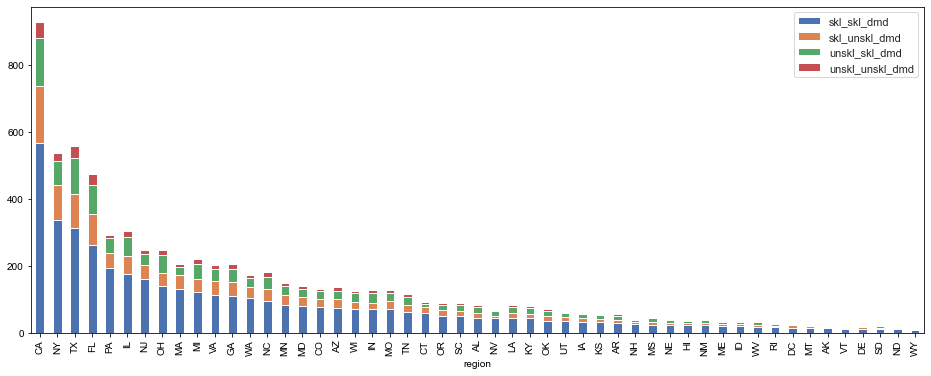

In [13]:
####create stacked bar

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1,figsize=(16,6))
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart

cons_dmd_intensity_gr_lm=cons_dmd_intensity_gr[['region','skl_skl_dmd','skl_unskl_dmd','unskl_skl_dmd','unskl_unskl_dmd']]
cons_dmd_intensity_gr_lm=cons_dmd_intensity_gr_lm.sort_values(by='skl_skl_dmd',ascending=False)
cons_dmd_intensity_gr_lm.set_index('region').plot(kind='bar', stacked=True,ax=ax)




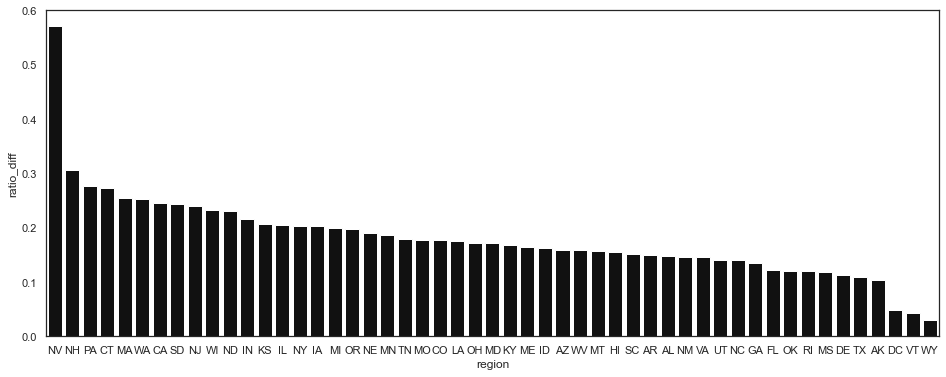

In [14]:
#caculate ratios and plot
cons_dmd_intensity_gr_lm['skl_su_ratio']=cons_dmd_intensity_gr_lm['skl_skl_dmd']/cons_dmd_intensity_gr_lm['skl_unskl_dmd']
cons_dmd_intensity_gr_lm['unskl_su_ratio']=cons_dmd_intensity_gr_lm['unskl_skl_dmd']/cons_dmd_intensity_gr_lm['unskl_unskl_dmd']

cons_dmd_intensity_gr_lm['ratio_diff']=cons_dmd_intensity_gr_lm['skl_su_ratio']-cons_dmd_intensity_gr_lm['unskl_su_ratio']
# cons_ratio_melt=cons_dmd_intensity_gr_lm.melt(id_vars='region',value_vars=['skl_su_ratio','unskl_su_ratio'])

cons_dmd_intensity_gr_lm=cons_dmd_intensity_gr_lm.sort_values(by='ratio_diff',ascending=False)

###plot
fig, ax = plt.subplots(1, 1,figsize=(16,6))


sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=cons_dmd_intensity_gr_lm,
    x="region", y='ratio_diff',
   palette=['#111111']
)



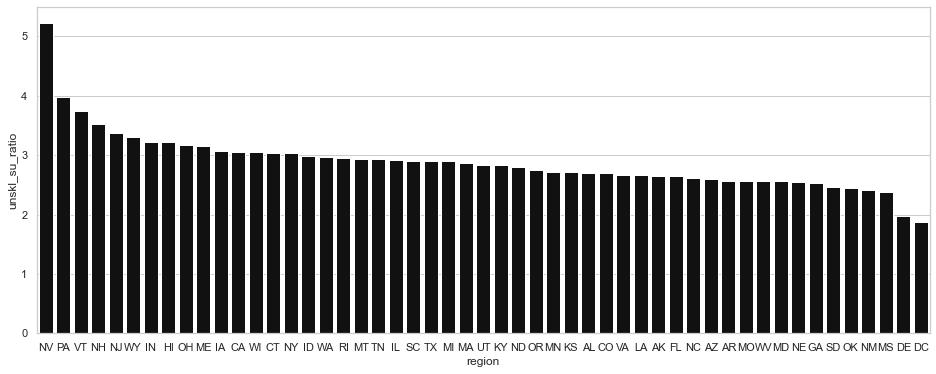

In [15]:
#caculate ratios and plot
cons_dmd_intensity_gr_lm['skl_su_ratio']=cons_dmd_intensity_gr_lm['skl_skl_dmd']/cons_dmd_intensity_gr_lm['skl_unskl_dmd']
cons_dmd_intensity_gr_lm['unskl_su_ratio']=cons_dmd_intensity_gr_lm['unskl_skl_dmd']/cons_dmd_intensity_gr_lm['unskl_unskl_dmd']

cons_dmd_intensity_gr_lm['ratio_diff']=cons_dmd_intensity_gr_lm['skl_su_ratio']-cons_dmd_intensity_gr_lm['unskl_su_ratio']
# cons_ratio_melt=cons_dmd_intensity_gr_lm.melt(id_vars='region',value_vars=['skl_su_ratio','unskl_su_ratio'])

cons_dmd_intensity_gr_lm=cons_dmd_intensity_gr_lm.sort_values(by='unskl_su_ratio',ascending=False)

###plot
fig, ax = plt.subplots(1, 1,figsize=(16,6))


sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=cons_dmd_intensity_gr_lm,
    x="region", y='unskl_su_ratio',
   palette=['#111111']
)


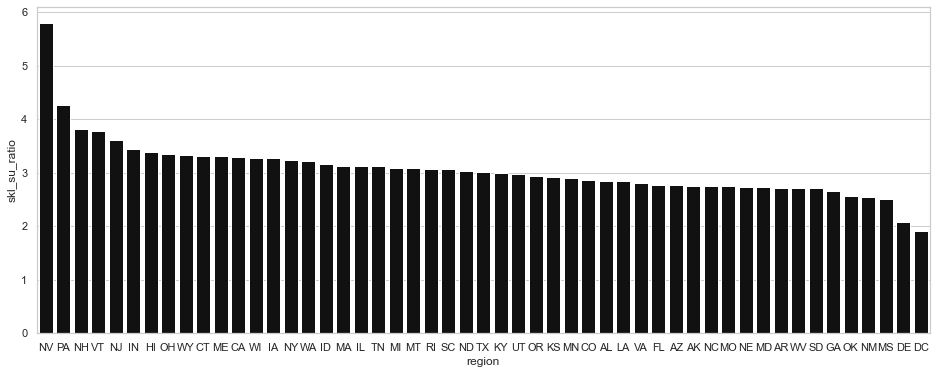

In [16]:
#caculate ratios and plot
cons_dmd_intensity_gr_lm['skl_su_ratio']=cons_dmd_intensity_gr_lm['skl_skl_dmd']/cons_dmd_intensity_gr_lm['skl_unskl_dmd']
cons_dmd_intensity_gr_lm['unskl_su_ratio']=cons_dmd_intensity_gr_lm['unskl_skl_dmd']/cons_dmd_intensity_gr_lm['unskl_unskl_dmd']

cons_dmd_intensity_gr_lm['ratio_diff']=cons_dmd_intensity_gr_lm['skl_su_ratio']-cons_dmd_intensity_gr_lm['unskl_su_ratio']
# cons_ratio_melt=cons_dmd_intensity_gr_lm.melt(id_vars='region',value_vars=['skl_su_ratio','unskl_su_ratio'])

cons_dmd_intensity_gr_lm=cons_dmd_intensity_gr_lm.sort_values(by='skl_su_ratio',ascending=False)

###plot
fig, ax = plt.subplots(1, 1,figsize=(16,6))


sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=cons_dmd_intensity_gr_lm,
    x="region", y='skl_su_ratio',
   palette=['#111111']
)

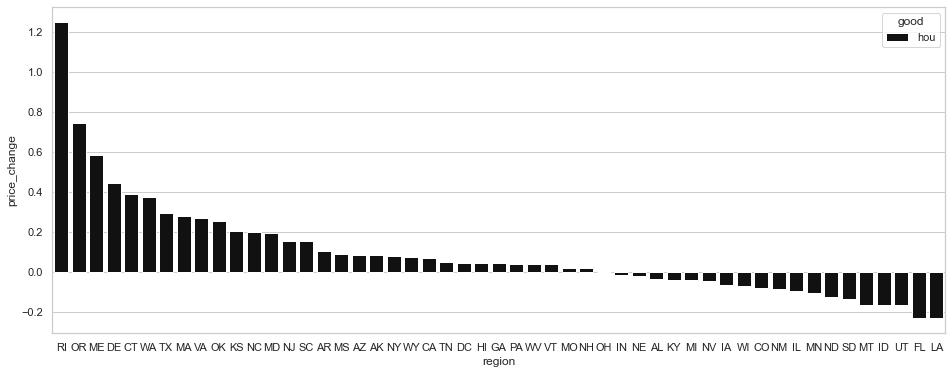

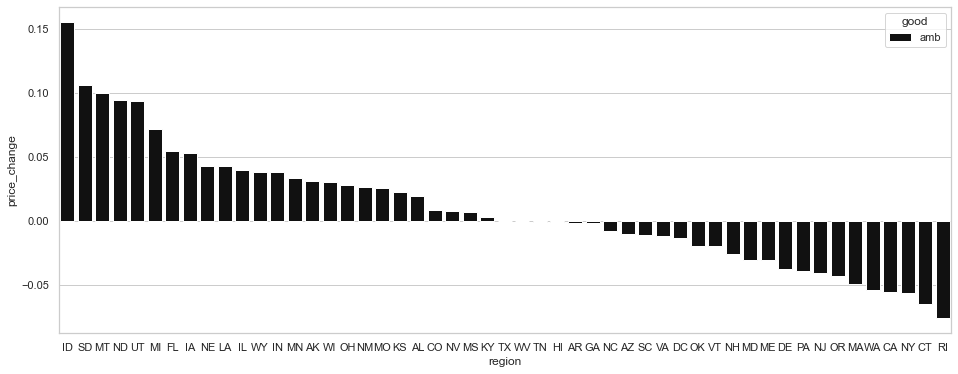

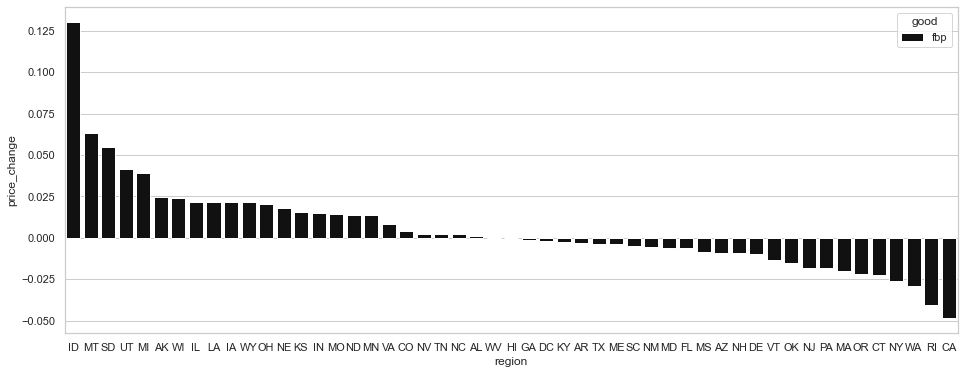

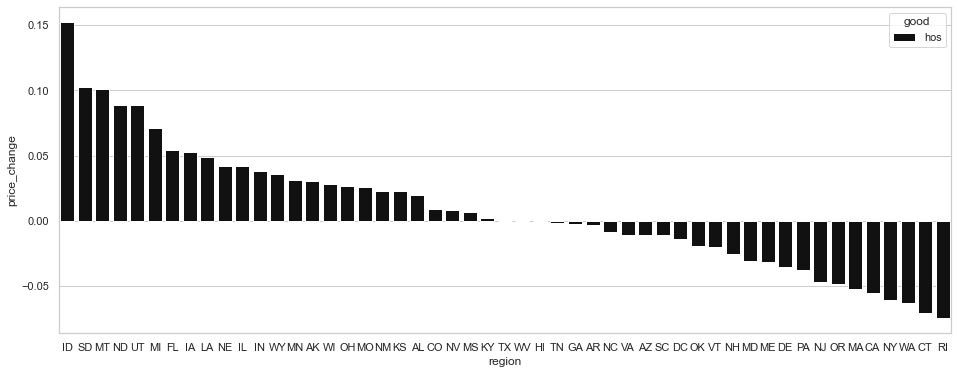

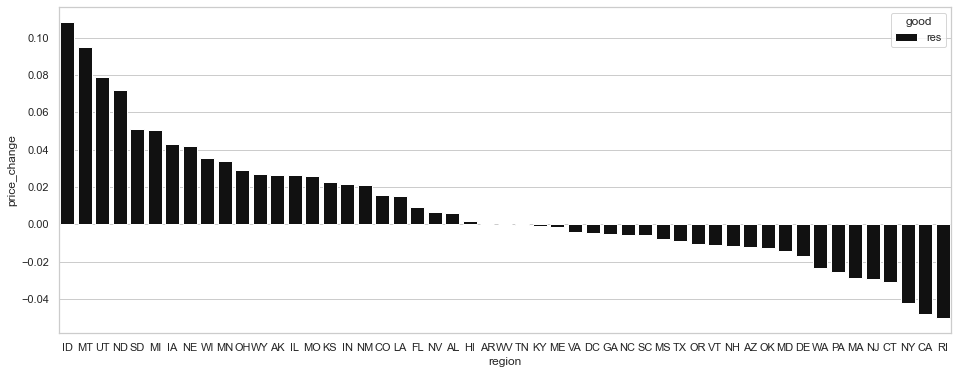

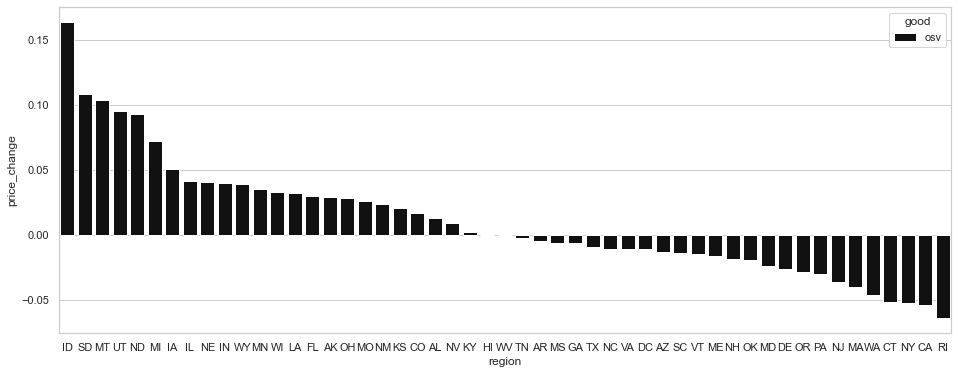

In [17]:
###plot good price change
for i in ['hou','amb','fbp','hos','res','osv']:
    
    py_hou=py_rpt0[py_rpt0['good']==i]
    py_hou['price_change']=py_hou['py0']-1

    fig, ax = plt.subplots(1, 1,figsize=(16,6))

    py_hou=py_hou.sort_values(by='price_change',ascending=False)

    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=py_hou,
        x="region", y='price_change',hue='good',
       palette=['#111111']
    )


In [159]:
# fig, ax = plt.subplots(1, 1,figsize=(15,6))
# labor_wage_pvt=labor_wage_pvt.sort_values(by='difference',ascending=True)
# colors = np.where(labor_wage_pvt['skl_quad']=='1','#377eb8','k')
# colors = np.where(labor_wage_pvt['skl_quad']=='2','#e41a1c',colors)
# colors = np.where(labor_wage_pvt['skl_quad']=='3','#dede00',colors)
# colors = np.where(labor_wage_pvt['skl_quad']=='4','k',colors)
# plt.bar(labor_wage_pvt['r'], labor_wage_pvt['difference'], color=colors,alpha=.7)
# plt.show()

In [ ]:
####calculate weighted consumption change by household and skill group

In [137]:
cons_b_total=cons0_rpt.groupby(['region'],as_index=False).sum()
cons_b_total=cons_b_total.rename(columns={'benchmark_cons':"benchmark_cons_tot"})
cons0_rpt=cons0_rpt.merge(cons_b_total,on='region')
cons0_rpt['pct_total_cons']=cons0_rpt['benchmark_cons']/cons0_rpt['benchmark_cons_tot']

#### Price change relative to national price



In [199]:
price_rel_nat_lm['good'].unique()

array(['res', 'amb', 'fbp', 'hou', 'hos', 'osv'], dtype=object)

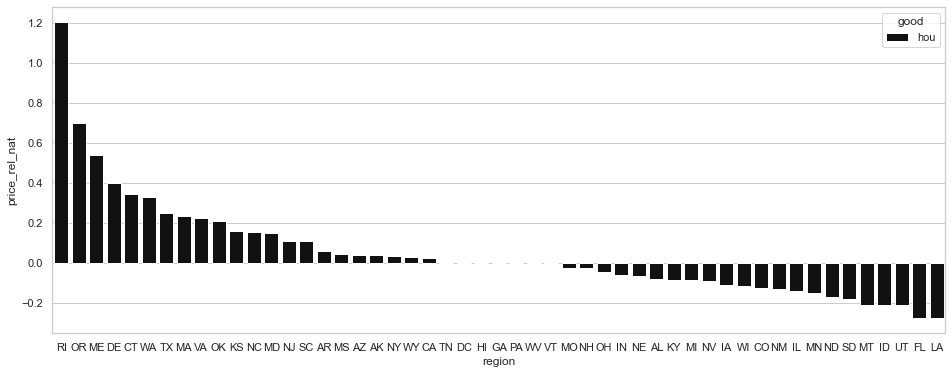

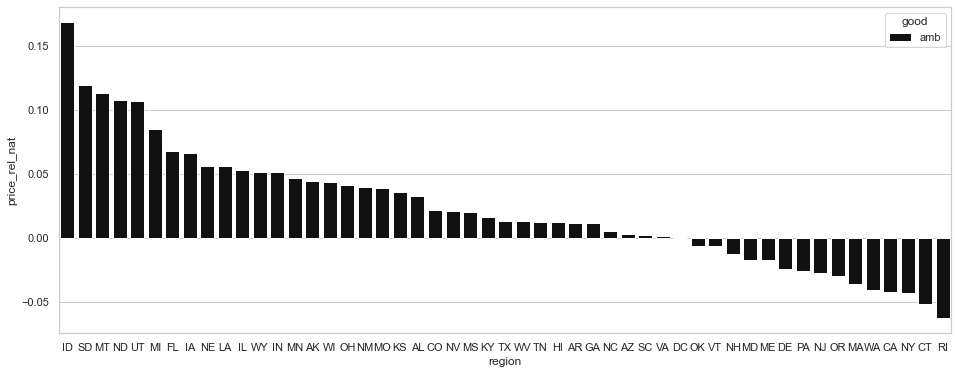

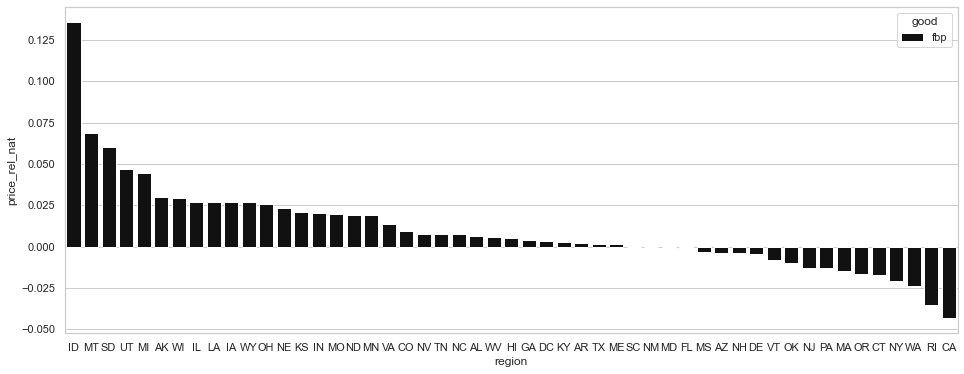

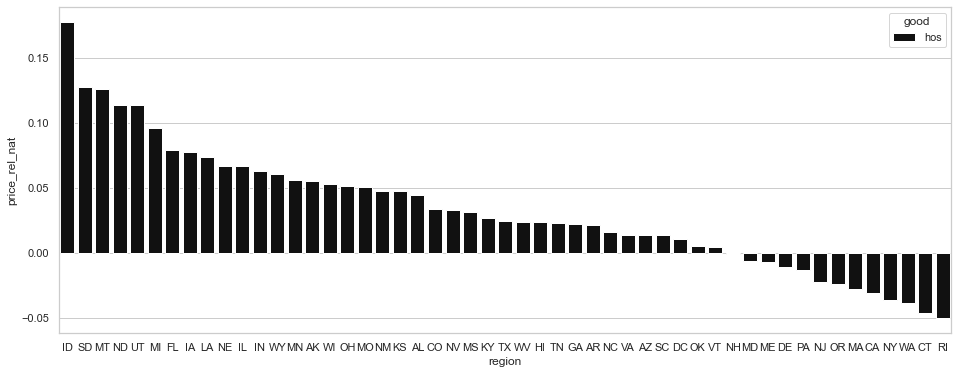

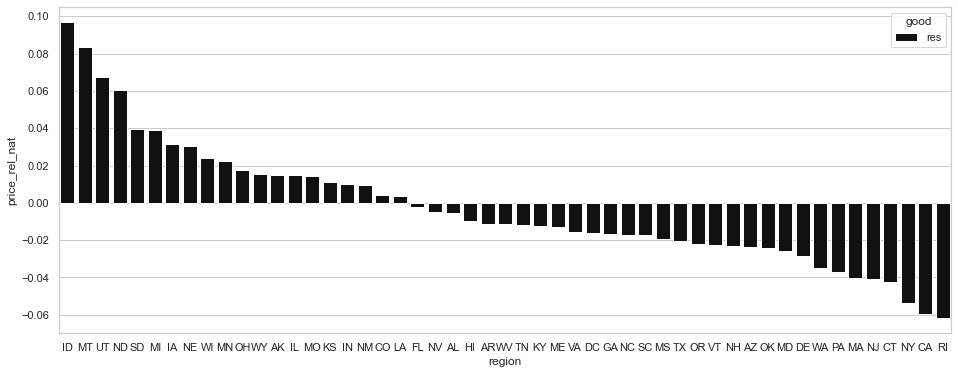

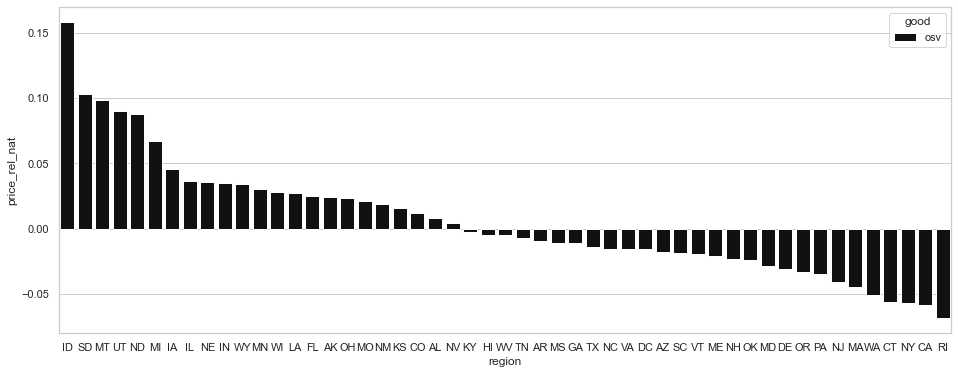

In [18]:
price_rel_nat=py_rpt0.merge(pn_rpt0,on='good')
price_rel_nat_lm=price_rel_nat[price_rel_nat['good'].isin(['hou','amb','fbp','hos','res','osv'])]

for i in ['hou','amb','fbp','hos','res','osv']:
    
    price_rel_nat_lm=price_rel_nat[price_rel_nat['good']==i]
    price_rel_nat_lm['price_rel_nat']=price_rel_nat_lm['py0']-price_rel_nat['pn0']

    fig, ax = plt.subplots(1, 1,figsize=(16,6))

    price_rel_nat_lm=price_rel_nat_lm.sort_values(by='price_rel_nat',ascending=False)

    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=price_rel_nat_lm,
        x="region", y='price_rel_nat',hue='good',
       palette=['#111111']
    )


#### Production to Total Goods Index

In [22]:
c_rpt0_weighted

,region,household,skill,cons_shock0,benchmark_cons
0,IA,hh1,skl,0.893369,0.975728
1,IA,hh1,unskl,0.884149,2.557730
2,IA,hh2,skl,0.928832,3.317571
3,IA,hh2,unskl,0.924991,5.288623
4,IA,hh3,skl,0.935295,7.234077
...,...,...,...,...,...
505,CO,hh3,unskl,0.886294,10.876755
506,CO,hh4,skl,0.917245,42.678692
507,CO,hh4,unskl,0.883470,14.465558
508,CO,hh5,skl,0.904437,107.091322


In [21]:
c_rpt0_weighted=c_rpt0.merge(cons0_rpt,on=['region','household','skill'])
c_rpt0_weighted['weighted_cons_shock']=c_rpt0_weighted['cons_shock0']*c_rpt0_weighted['pct_total_cons']
c_rpt0_weighted_gr=c_rpt0_weighted.groupby('region',as_index=False).sum()
c_rpt0_weighted_gr=c_rpt0_weighted_gr[['region','weighted_cons_shock']]
trade=c_rpt0_weighted_gr.merge(y_rpt0,on='region')
trade['prod_to_cons_ratio']=trade['output_shock0']/trade['weighted_cons_shock']

###limit to top 5 expenditure goods
trade_lm=trade[trade['sector'].isin(['hou','amb','fbp','hos','res','osv'])]

###plot by good and region

for i in ['hou','amb','fbp','hos','res','osv']:
    fig, ax = plt.subplots(1, 1,figsize=(16,6))

    
    trade_lm_lm=trade_lm[trade_lm['sector']==i].sort_values(by='prod_to_cons_ratio',ascending=False)
    
    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=trade_lm_lm,
        x="region", y='prod_to_cons_ratio',hue='sector'
    )


KeyError: 'pct_total_cons'

#### Percent local exports by industry

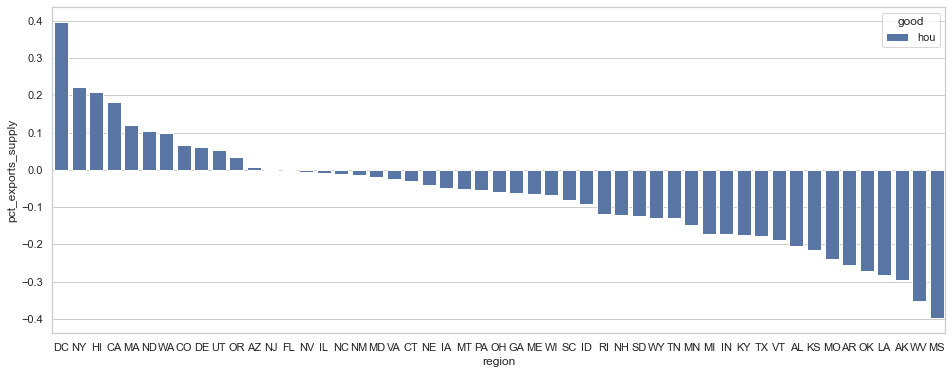

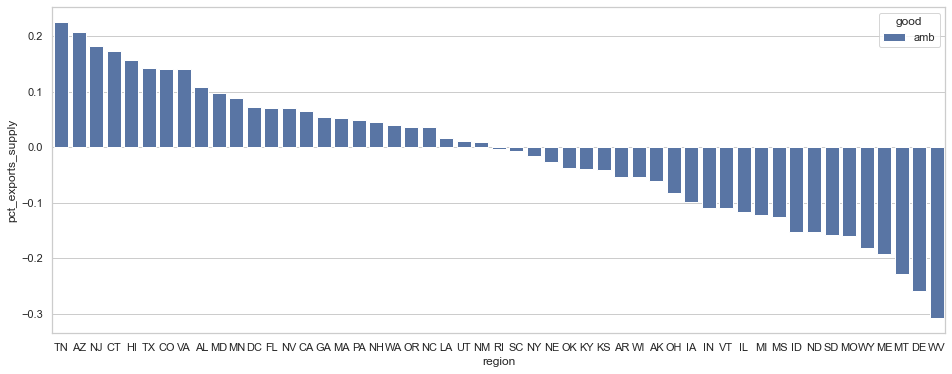

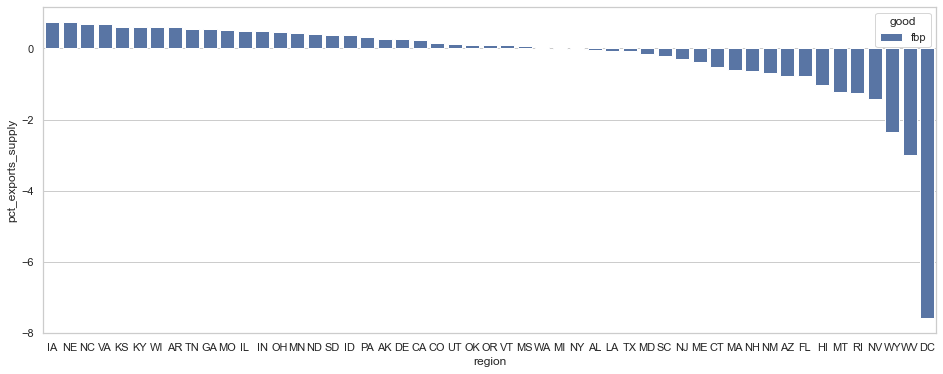

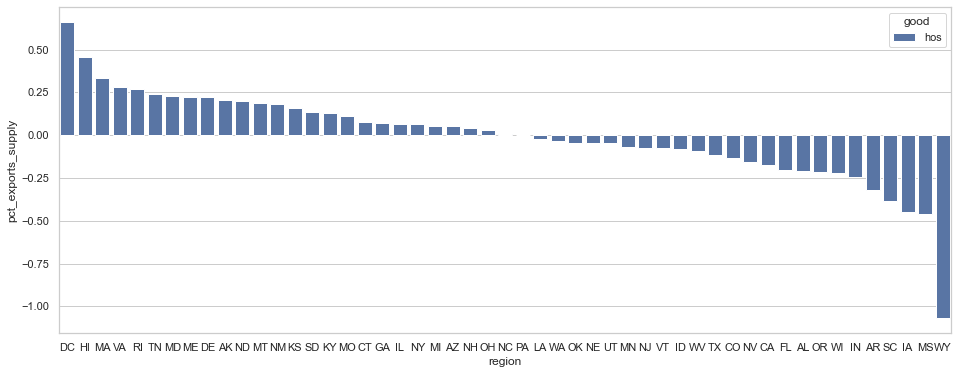

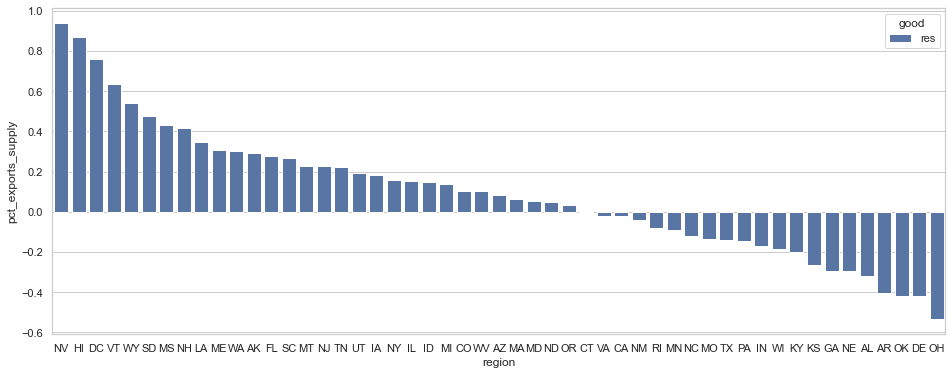

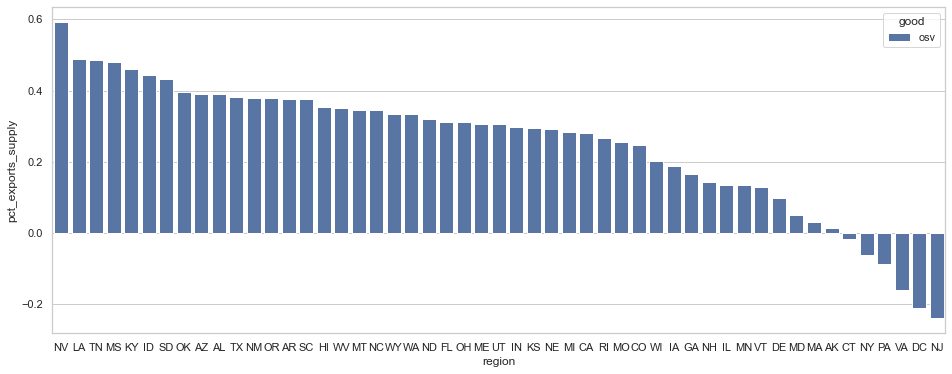

In [20]:
cons_b_gr=cd0_h_d_rpt.groupby(['region','good'],as_index=False).sum()
ys0_gr=ys0_rpt.groupby(['region','good'],as_index=False).sum()
benchmark_exports=cons_b_gr.merge(ys0_gr,on=['region','good'])
benchmark_exports['exports']=benchmark_exports['benchmark_supply']-benchmark_exports['benchmark_disagg_cons']
benchmark_exports['pct_exports_supply']=benchmark_exports['exports']/benchmark_exports['benchmark_supply']

for i in ['hou','amb','fbp','hos','res','osv']:
    fig, ax = plt.subplots(1, 1,figsize=(16,6))

    
    benchmark_exports_lm=benchmark_exports[benchmark_exports['good']==i].sort_values(by='pct_exports_supply',ascending=False)
    
    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=benchmark_exports_lm,
        x="region", y='pct_exports_supply',hue='good')


In [162]:
ys0_rpt.head()

,region,sector,good,benchmark_supply
0,IA,ppd,ppd,2.609296
1,IA,ppd,com,0.000540
2,IA,ppd,con,0.001220
3,IA,ppd,tex,0.002836
4,IA,ppd,nmp,0.002320


In [118]:
a_rpt0.head()

,region,good,a0
0,IA,ppd,0.916397
1,IA,res,0.897370
2,IA,com,0.961539
3,IA,amb,0.891614
4,IA,fbp,0.914133


In [112]:
labor_wage=shocks_lm.drop_duplicates(subset=['r','sk']).merge(pl_rpt0,left_on=['r','sk'],right_on=['region','skill'],how='inner')
labor_wage['wage_diff']=labor_wage['pl_shock0']-1
limit_states=['HI','WY','VT','AK','TN','DC','NH','WV']
labor_wage=labor_wage[~(labor_wage['region'].isin(limit_states))]


labor_wage_skl=labor_wage[(labor_wage['skill']=='skl') ]
labor_wage_unskl=labor_wage[(labor_wage['skill']=='unskl') & (~labor_wage['pct_shock'].isin(limit_states))]


In [113]:
# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'1','')

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]>0)),'2',labor_wage_pvt['skl_quad'] )

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]<0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'3',labor_wage_pvt['skl_quad'] )

labor_wage_pvt['skl_quad'] = np.where(((labor_wage_pvt["difference"]>0 )& (labor_wage_pvt["wage_diff_skl"]<0)),'4',labor_wage_pvt['skl_quad'] )



labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]>0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'1','')

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]>0)),'2',labor_wage_pvt['unskl_quad'] )

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]<0 )& (labor_wage_pvt["wage_diff_unskl"]<0)),'3',labor_wage_pvt['unskl_quad'] )

labor_wage_pvt['unskl_quad'] = np.where(((labor_wage_pvt["pct_shock_unskl"]>0 )& (labor_wage_pvt["wage_diff_unskl"]<0)),'4',labor_wage_pvt['unskl_quad'] )


In [39]:
ld0_d_rpt[(ld0_d_rpt['file']=='OR') & (ld0_d_rpt['sector']=='mmf') ]

,file,sector,skill,benchmark_ld0
staticmodel_d2_tsubsonly_bmk,OR,mmf,skl,0.594966
staticmodel_d2_tsubsonly_bmk,OR,mmf,unskl,0.154043


In [46]:
# fig, ax = plt.subplots(1, 1,figsize=(15,6))



# labor_wage_pvt=labor_wage_pvt.sort_values(by='difference',ascending=True)

# colors = np.where(labor_wage_pvt['skl_quad']=='1','#377eb8','k')
# colors = np.where(labor_wage_pvt['skl_quad']=='2','#e41a1c',colors)
# colors = np.where(labor_wage_pvt['skl_quad']=='3','#dede00',colors)
# colors = np.where(labor_wage_pvt['skl_quad']=='4','k',colors)


# plt.bar(labor_wage_pvt['r'], labor_wage_pvt['difference'], color=colors,alpha=.7)
 
# # plt.xlabel("Courses offered")
# # plt.ylabel("No. of students enrolled")
# # plt.title("Students enrolled in different courses")
# plt.show()

In [60]:
labor_breakout=le0_d_rpt.groupby(['region','skill'],as_index=False).sum()

labor_breakout_tot=le0_d_rpt.groupby(['region'],as_index=False).sum()
labor_breakout_tot=labor_breakout_tot.rename(columns={"benchmark_le0":"benchmark_le0_tot"})
labor_breakout=labor_breakout.merge(labor_breakout_tot,on='region')
labor_breakout['pct_total']=labor_breakout['benchmark_le0']/labor_breakout['benchmark_le0_tot']

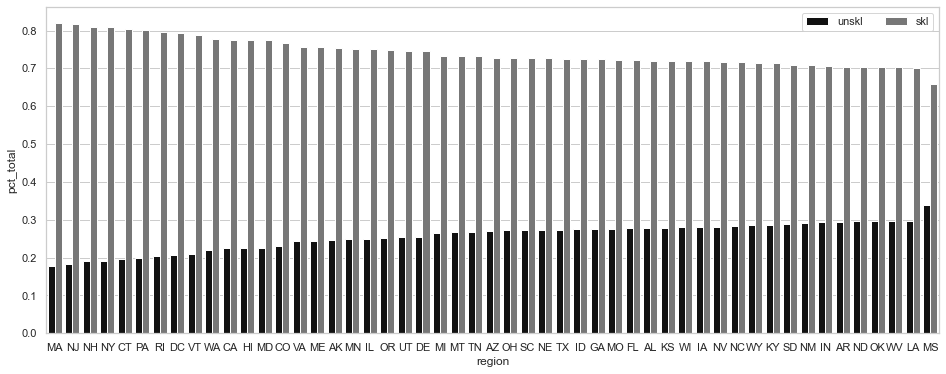

In [64]:
fig, ax = plt.subplots(1, 1,figsize=(16,6))
labor_breakout=labor_breakout.sort_values(by=['pct_total'],ascending=True)

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=labor_breakout,
    x="region", y='pct_total',hue='skill',
   palette=['#111111','#777777']
)
plt.legend(ncol=2)


In [94]:
####get expenditure share on medical care by state

cd0_breakout=cd0_h_d_rpt[cd0_h_d_rpt['good']=='hou'].groupby(['region','skill'],as_index=False).sum()

cd0_breakout_tot=cd0_h_d_rpt.groupby(['region','skill'],as_index=False).sum()
cd0_breakout_tot=cd0_breakout_tot.rename(columns={"benchmark_disagg_cons":"benchmark_disagg_cons_tot"})
cd0_breakout=cd0_breakout.merge(cd0_breakout_tot,on=['region','skill'])
cd0_breakout['pct_total']=cd0_breakout['benchmark_disagg_cons']/cd0_breakout['benchmark_disagg_cons_tot']

In [107]:
ys0_rpt_gr=ys0_rpt.groupby(['region','good'],as_index=False).sum()
cd0_gr=cd0_h_d_rpt.groupby(['region','good'],as_index=False).sum()

In [108]:
trade_df=ys0_rpt_gr.merge(cd0_gr,on=['region','good'],how='inner')

In [113]:
trade_df['exports']=trade_df['benchmark_supply']-trade_df['benchmark_disagg_cons']
trade_df['pct_export']=trade_df['exports']/trade_df['benchmark_supply']

No handles with labels found to put in legend.


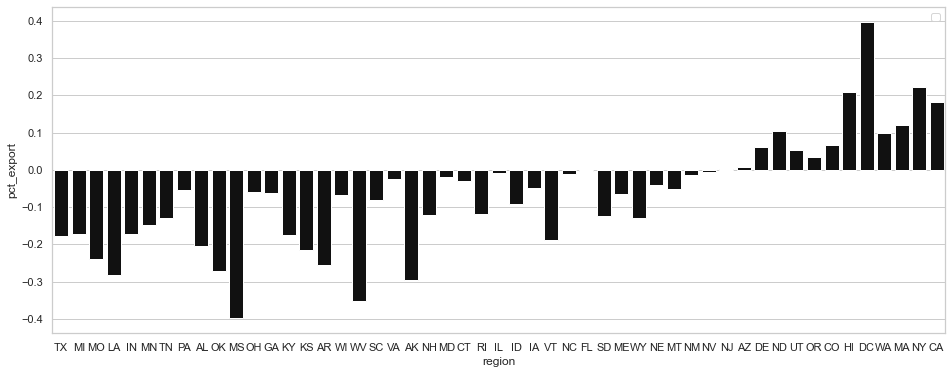

In [114]:
fig, ax = plt.subplots(1, 1,figsize=(16,6))
trade_df_lm=trade_df[trade_df['good']=='hou'].sort_values(by='exports',ascending=True)

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=trade_df_lm,
    x="region", y='pct_export',
   palette=['#111111']
)
plt.legend(ncol=2)
